# Modelo 1

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos (entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transformación: Agregar ruido gaussiano
noise_level = 0.05
x_train += noise_level * np.random.randn(*x_train.shape)
x_test += noise_level * np.random.randn(*x_test.shape)

# Asegúrate de que las etiquetas estén en formato uno-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Construir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),  # Puedes cambiar el learning_rate aquí
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

/Users/alejandrocortes/.conda/envs/tensorflow/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/Users/alejandrocortes/.conda/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-24 07:53:25.812549: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-24 07:53:25.812567: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-24 07:53:25.812577: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-24 07:53:25.812594: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-24 07:53:25.812608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devic

Epoch 1/10


2024-12-24 07:53:26.343723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8162 - loss: 0.1120 - val_accuracy: 0.9547 - val_loss: 0.0268
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9559 - loss: 0.0285 - val_accuracy: 0.9657 - val_loss: 0.0206
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9696 - loss: 0.0199 - val_accuracy: 0.9726 - val_loss: 0.0168
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9753 - loss: 0.0156 - val_accuracy: 0.9736 - val_loss: 0.0162
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9800 - loss: 0.0128 - val_accuracy: 0.9765 - val_loss: 0.0149
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9835 - loss: 0.0107 - val_accuracy: 0.9780 - val_loss: 0.0142
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9852 - loss: 0.0099 - val_accuracy: 0.9777 - val_loss: 0.0143
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9871 - loss: 0.00

In [6]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [7]:
predictions[0]

array([1.0859731e-17, 8.5342561e-16, 2.1056425e-16, 2.7510975e-17,
       2.9778329e-19, 2.1738402e-18, 2.4900963e-18, 1.0000000e+00,
       1.4576620e-17, 1.7187130e-16], dtype=float32)

In [3]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Función para ajustar el learning rate
def lr_range_test(model, x_train, y_train, start_lr, end_lr, epochs=5):
    steps_per_epoch = len(x_train) // 128

    # Escalado de la tasa de aprendizaje
    def schedule(epoch):
        return start_lr + (end_lr - start_lr) * epoch / epochs

    lr_callback = LearningRateScheduler(schedule)

    # Guardo el estado actual del modelo
    weights_backup = model.get_weights()

    # Entrenar con la tasa de aprendizaje escalada
    model.fit(x_train, y_train, epochs=epochs, callbacks=[lr_callback], steps_per_epoch=steps_per_epoch, verbose=2)

    # Restaurar el estado del modelo original
    model.set_weights(weights_backup)

    # Analisar los resultados para identificar el range óptimo de learning rate

In [4]:
lr_range_test(model, x_train, y_train, 0.1, 0.0001)

Epoch 1/5
468/468 - 5s - 11ms/step - accuracy: 0.1106 - loss: 0.5760 - learning_rate: 0.1000
Epoch 2/5


2024-12-24 08:02:30.833865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-24 08:02:30.833892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_20]]
2024-12-24 08:02:30.833940: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16376468700158435429
2024-12-24 08:02:30.833949: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7034988200487379211
2024-12-24 08:02:30.833952: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17236044150823342254
2024-12-24 08:02:30.833963: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6343433725552753102
2024-12-

468/468 - 5s - 10ms/step - accuracy: 0.1048 - loss: 0.3257 - learning_rate: 0.0800
Epoch 3/5


2024-12-24 08:02:35.367308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-24 08:02:35.367325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add/_24]]
2024-12-24 08:02:35.367339: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16376468700158435429
2024-12-24 08:02:35.367345: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7034988200487379211
2024-12-24 08:02:35.367349: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17236044150823342254
2024-12-24 08:02:35.367362: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15208236390

468/468 - 5s - 10ms/step - accuracy: 0.1056 - loss: 0.3253 - learning_rate: 0.0600
Epoch 4/5


2024-12-24 08:02:40.051830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-24 08:02:40.051848: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 13699724565565618352
2024-12-24 08:02:40.051853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/ArgMax/_40]]
2024-12-24 08:02:40.051865: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16376468700158435429
2024-12-24 08:02:40.051871: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 7034988200487379211
2024-12-24 08:02:40.051874: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6343433725552

468/468 - 4s - 10ms/step - accuracy: 0.1078 - loss: 0.3252 - learning_rate: 0.0401
Epoch 5/5


2024-12-24 08:02:44.548207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-24 08:02:44.548230: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17236044150823342254
2024-12-24 08:02:44.548251: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1520823639084843680
2024-12-24 08:02:44.548260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14166504260420899512
2024-12-24 08:02:44.548263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/stateless_random_uniform/StatelessRandomGetKeyCounter/_44]]
2024-12-24 08:02:44.548271: I tensorflow/core/framewor

468/468 - 4s - 9ms/step - accuracy: 0.1094 - loss: 0.3251 - learning_rate: 0.0201


2024-12-24 08:02:48.994483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-24 08:02:48.994502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_22]]
2024-12-24 08:02:48.994513: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16376468700158435429
2024-12-24 08:02:48.994519: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17236044150823342254
2024-12-24 08:02:48.994531: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1520823639084843680
2024-12-24 08:02:48.994537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 70349882

# Modelo 2:

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8343 - loss: 0.5663 - val_accuracy: 0.9567 - val_loss: 0.1517
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9581 - loss: 0.1406 - val_accuracy: 0.9660 - val_loss: 0.1157
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9728 - loss: 0.0938 - val_accuracy: 0.9715 - val_loss: 0.0937
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9773 - loss: 0.0713 - val_accuracy: 0.9755 - val_loss: 0.0837
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9844 - loss: 0.0518 - val_accuracy: 0.9757 - val_loss: 0.0844
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9878 - loss: 0.0407 - val_accuracy: 0.9740 - val_loss: 0.0948
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9734 - val_loss: 0.0993
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.

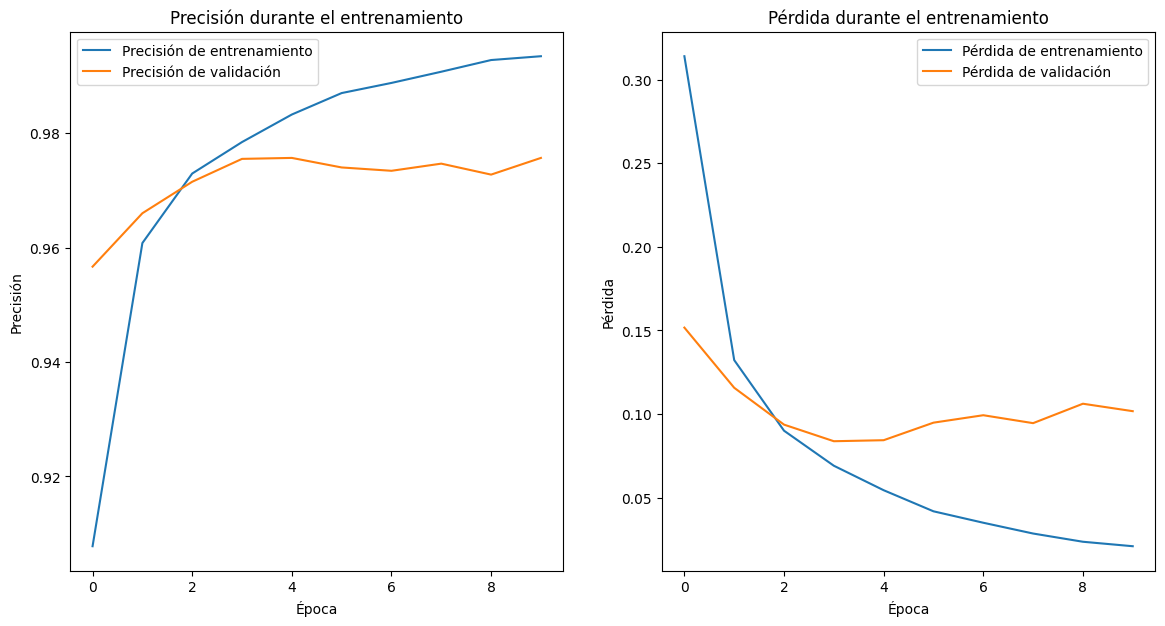

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos (transformación simple)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Codificar las etiquetas en caliente (aunque usaremos SparseCategoricalCrossentropy, 
# lo dejo aquí por si necesitas cambiar a CategoricalCrossentropy en el futuro)
# y_train = to_categorical(y_train)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Definir la red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)  # Puedes cambiar este valor para experimentar
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val), 
                    batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')

# Graficar la precisión y la pérdida
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

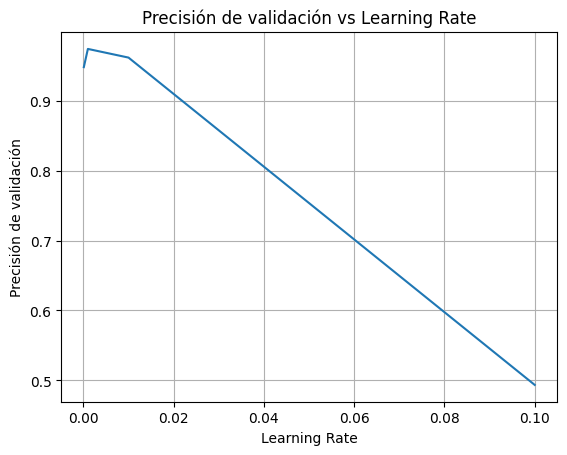

In [10]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
accuracies = []

for lr in learning_rates:
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, 
                        validation_data=(x_val, y_val), 
                        batch_size=64, 
                        verbose=0)

    accuracies.append(max(history.history['val_accuracy']))

plt.plot(learning_rates, accuracies)
plt.title('Precisión de validación vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Precisión de validación')
plt.grid(True)
plt.show()